In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
import glob

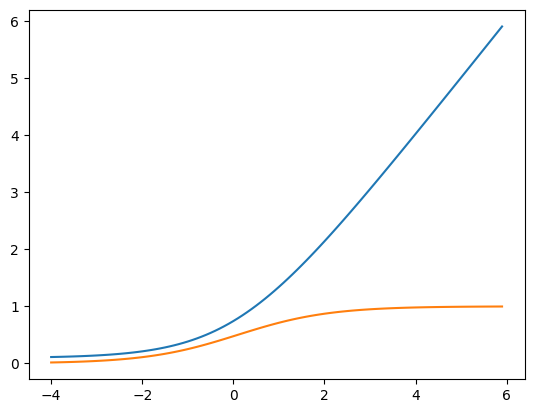

In [2]:
def df(f, x, **kwargs):
    eps = 0.001
    return (f(x + eps, **kwargs) - f(x, **kwargs)) / eps

def f(x):
    return np.log(np.exp(x) + 1.1)

x = np.arange(-5, 5., 0.1) + 1
plt.plot(x, f(x))
plt.plot(x, df(f, x))
plt.show()

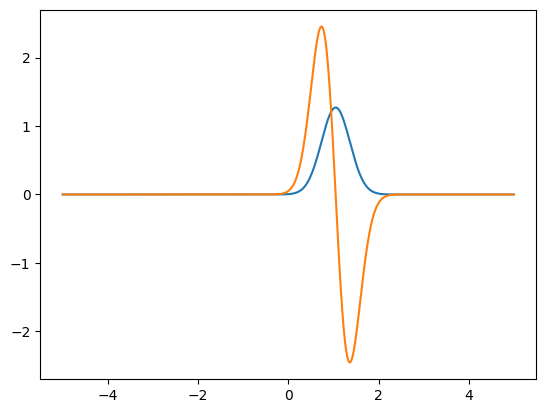

10.000000000000211


In [3]:
def n(x, mu=0, sig=1):
    var = sig#sig ** 2
    return (1/np.sqrt(var * 2 * np.pi)) * np.exp(-(x-mu)**2/(2*var))

mu, sig = 1.0459, 0.0985671
x = np.arange(-5, 5., 0.01)
y = n(x, mu, sig)
plt.plot(x, y)
plt.plot(x, df(n, x, mu=mu, sig=sig))
plt.show()

s = 0
for i, y_i in enumerate(y[1:]):
    dx = 0.1
    s += y_i * dx
print(s)

In [6]:
tbl = pd.read_csv('/tmp/plot73.csv')

In [7]:
tbl

,b0,b1,dpr,gb0,gb1,gw0,gw1,pr,w0,w1,x,Unnamed: 11
0,0.567923,-0.800586,1,-0.014138,-0.006584,0.042415,0.019751,0.072241,0.124555,-1.60421,-3.00,NaN
1,0.567923,-0.800586,1,-0.014862,-0.006697,0.043695,0.019688,0.073641,0.124555,-1.60421,-2.94,NaN
2,0.567923,-0.800586,1,-0.015640,-0.006803,0.045044,0.019594,0.075092,0.124555,-1.60421,-2.88,NaN
3,0.567923,-0.800586,1,-0.016477,-0.006902,0.046466,0.019464,0.076595,0.124555,-1.60421,-2.82,NaN
4,0.567923,-0.800586,1,-0.017379,-0.006991,0.047966,0.019295,0.078152,0.124555,-1.60421,-2.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.567923,-0.800586,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.124555,-1.60421,2.70,NaN
96,0.567923,-0.800586,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.124555,-1.60421,2.76,NaN
97,0.567923,-0.800586,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.124555,-1.60421,2.82,NaN
98,0.567923,-0.800586,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.124555,-1.60421,2.88,NaN


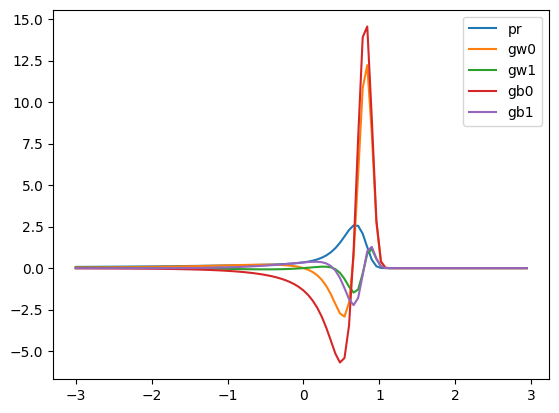

In [8]:
x = tbl['x']
gb0 = tbl['gb0']
gb1 = tbl['gb1']
gw0 = tbl['gw0']
gw1 = tbl['gw1']

pr = tbl['pr']

plt.plot(x, pr, label='pr')
plt.plot(x, gw0, label='gw0')
plt.plot(x, gw1, label='gw1')
plt.plot(x, gb0, label='gb0')
plt.plot(x, gb1, label='gb1')
plt.legend()
plt.show()

In [25]:
# Load all CSV files from the directory
csv_files = [f"/tmp/plot{i}.csv" for i in range(100)]  # Adjust the path to your files

print(csv_files)

# Setup the figure and axis for the animation
fig, ax = plt.subplots()

# Initialize empty line objects for each parameter
line_w0, = ax.plot([], [], label='w0')
line_w1, = ax.plot([], [], label='w1')
line_b0, = ax.plot([], [], label='b0')
line_b1, = ax.plot([], [], label='b1')

# Set up the plot limits and labels
# ax.set_xlim(0, 100)  # Adjust x-limits based on your data
ax.set_ylim(-5, 5)   # Adjust y-limits based on your data
ax.legend()

# Initialize the plot
def init():
    print('init')
    line_w0.set_data([], [])
    line_w1.set_data([], [])
    line_b0.set_data([], [])
    line_b1.set_data([], [])
    return line_w0, line_w1, line_b0, line_b1

# Update function for the animation
def update(i, line_w0, line_w1, line_b0, line_b1):
    # Load the i-th CSV file
    tbl = pd.read_csv(csv_files[i])
    if i == 0:
        print('update')
    # Extract the x-values and parameters
    x = tbl['x']
    w0 = tbl['w0']
    w1 = tbl['w1']
    b0 = tbl['b0']
    b1 = tbl['b1']

    # Update the lines with new data
    line_w0.set_data(x, w0)
    line_w1.set_data(x, w1)
    line_b0.set_data(x, b0)
    line_b1.set_data(x, b1)

    return line_w0, line_w1, line_b0, line_b1

# Create the animation object
ani = animation.FuncAnimation(fig, update, len(csv_files), fargs=(line_w0, line_w1, line_b0, line_b1), init_func=init, blit=True, repeat=False)

# Display the plot
plt.show()

['/tmp/plot0.csv', '/tmp/plot1.csv', '/tmp/plot2.csv', '/tmp/plot3.csv', '/tmp/plot4.csv', '/tmp/plot5.csv', '/tmp/plot6.csv', '/tmp/plot7.csv', '/tmp/plot8.csv', '/tmp/plot9.csv', '/tmp/plot10.csv', '/tmp/plot11.csv', '/tmp/plot12.csv', '/tmp/plot13.csv', '/tmp/plot14.csv', '/tmp/plot15.csv', '/tmp/plot16.csv', '/tmp/plot17.csv', '/tmp/plot18.csv', '/tmp/plot19.csv', '/tmp/plot20.csv', '/tmp/plot21.csv', '/tmp/plot22.csv', '/tmp/plot23.csv', '/tmp/plot24.csv', '/tmp/plot25.csv', '/tmp/plot26.csv', '/tmp/plot27.csv', '/tmp/plot28.csv', '/tmp/plot29.csv', '/tmp/plot30.csv', '/tmp/plot31.csv', '/tmp/plot32.csv', '/tmp/plot33.csv', '/tmp/plot34.csv', '/tmp/plot35.csv', '/tmp/plot36.csv', '/tmp/plot37.csv', '/tmp/plot38.csv', '/tmp/plot39.csv', '/tmp/plot40.csv', '/tmp/plot41.csv', '/tmp/plot42.csv', '/tmp/plot43.csv', '/tmp/plot44.csv', '/tmp/plot45.csv', '/tmp/plot46.csv', '/tmp/plot47.csv', '/tmp/plot48.csv', '/tmp/plot49.csv', '/tmp/plot50.csv', '/tmp/plot51.csv', '/tmp/plot52.csv', '/

<IPython.core.display.Javascript object>